In [ ]:
#INTRODUCTION
#This notebook presents an analysis of synthetic customer activity data
#for an e-commerce platform. The goal is to extract actionable insights,
#engineer meaningful features, and build a predictive model to understand 
#session conversion behavior. 
#The workflow includes data cleaning, feature engineering, modeling, visualization, 
#and a discussion of scalable big data tools.

In [ ]:
#SECTION 1 SYNTHETIC DATA GENERATION

In [354]:
#CUSTOMER DEMOGRAPHIC DATA GENERATION
import random
import pandas as pd
from faker import Faker

fake = Faker()
Faker.seed(42)

# Generate 100 customers
customers = []
for i in range(100):
    customer = {
        "customer_id": i + 1,
        "name": fake.name(),
        "age": random.randint(18, 70),
        "gender": random.choice(["Male", "Female"]),
        "location": fake.city(),
        "email": fake.email()
    }
    customers.append(customer)

# Convert to DataFrame
df_customers = pd.DataFrame(customers)
df_customers.head()

,customer_id,name,age,gender,location,email
0,1,Allison Hill,37,Female,East Jill,garzaanthony@example.org
1,2,Jonathan Johnson,60,Male,Lake Debra,lrobinson@example.com
2,3,Abigail Shaffer,69,Male,Petersonberg,susanrogers@example.org
3,4,Ian Cooper,67,Male,Lindsaymouth,dudleynicholas@example.net
4,5,Mark Mcclure,52,Female,Barbaraland,stanleykendra@example.org


In [355]:
#BROWSING SESSIONS DATA GENERATION

import numpy as np
from datetime import datetime, timedelta

# Generate 500 browsing sessions
sessions = []
for i in range(500):
    session = {
        "session_id": i + 1,
        "customer_id": random.randint(1, 100),  # link to existing customers
        "session_duration": random.randint(30, 1800),  # seconds
        "pages_visited": random.randint(1, 20),
        "device_type": random.choice(["Mobile", "Desktop", "Tablet"]),
        "session_start": fake.date_time_between(start_date='-6M', end_date='now')
    }
    sessions.append(session)

df_sessions = pd.DataFrame(sessions)
df_sessions.head()

,session_id,customer_id,session_duration,pages_visited,device_type,session_start
0,1,38,1652,6,Tablet,2025-09-20 21:14:37
1,2,100,1573,3,Desktop,2025-07-20 04:45:31
2,3,37,268,10,Tablet,2025-06-04 21:01:51
3,4,34,275,10,Tablet,2025-09-26 21:48:45
4,5,46,1262,5,Mobile,2025-07-29 15:35:59


In [356]:
#PRODUCT PURCHASE DATA GENERATION

product_categories = ["Electronics", "Clothing", "Books", "Home & Kitchen", "Beauty", "Sports", "Health and Wellness"]

# Generate 300 purchases
purchases = []
for i in range(300):
    purchase = {
        "purchase_id": i + 1,
        "session_id": random.randint(1, 500),
        "product_id": f"P{random.randint(1000, 9999)}",
        "category": random.choice(product_categories),
        "price": round(random.uniform(5.0, 500.0), 2),
        "quantity": random.randint(1, 5),
        "purchase_time": fake.date_time_between(start_date='-6M', end_date='now')
    }
    purchases.append(purchase)

df_purchases = pd.DataFrame(purchases)
df_purchases.head()

,purchase_id,session_id,product_id,category,price,quantity,purchase_time
0,1,63,P7134,Home & Kitchen,282.11,2,2025-08-01 23:27:20
1,2,335,P4148,Clothing,19.27,3,2025-06-02 13:43:29
2,3,6,P8746,Books,212.44,2,2025-05-01 11:55:23
3,4,105,P8303,Sports,44.24,1,2025-06-26 13:51:14
4,5,170,P8400,Clothing,298.38,5,2025-04-15 10:38:52


In [357]:
#PRODUCT INTERACTION DATA GENERATION

interaction_types = ["click", "add_to_cart", "wishlist", "reviews"]

interactions = []
for i in range(800):
    interaction = {
        "interaction_id": i + 1,
        "session_id": random.randint(1, 500),
        "product_id": f"P{random.randint(1000, 9999)}",
        "interaction_type": random.choice(interaction_types),
        "interaction_time": fake.date_time_between(start_date='-6M', end_date='now')
    }
    interactions.append(interaction)

df_interactions = pd.DataFrame(interactions)
df_interactions.head()

,interaction_id,session_id,product_id,interaction_type,interaction_time
0,1,381,P3808,wishlist,2025-05-14 01:26:06
1,2,158,P1140,wishlist,2025-09-11 07:37:16
2,3,436,P6471,reviews,2025-05-01 05:13:22
3,4,256,P9749,click,2025-07-17 18:01:27
4,5,55,P9248,wishlist,2025-08-21 09:34:15


In [358]:
#SECTION 2 DATA MERGING AND CUSTOMER MAPPING

In [359]:
# Merge customer demographics with browsing sessions
df_customer_sessions = pd.merge(df_sessions, df_customers, on='customer_id', how='left')
df_customer_sessions.head()

,session_id,customer_id,session_duration,pages_visited,device_type,session_start,name,age,gender,location,email
0,1,38,1652,6,Tablet,2025-09-20 21:14:37,Victoria Johnson,42,Female,Reedmouth,gobrien@example.org
1,2,100,1573,3,Desktop,2025-07-20 04:45:31,Jordan Chambers,22,Female,Brendastad,leonardthomas@example.net
2,3,37,268,10,Tablet,2025-06-04 21:01:51,Benjamin Ayala,68,Male,Darlenefurt,sheila14@example.org
3,4,34,275,10,Tablet,2025-09-26 21:48:45,Nicole Frost,20,Male,Port Francisco,nicolejohnson@example.net
4,5,46,1262,5,Mobile,2025-07-29 15:35:59,Robert Contreras,22,Female,Stephaniemouth,jrivas@example.com


In [360]:
#GENERATE REALISTIC TIMES FOR PURCHASES AND INTERACTIONS SINCE BOTH CAN ONLY OCCUR AFTER SESSION STARTS
def random_time_between(start, end):
    delta = end - start
    random_seconds = np.random.randint(0, int(delta.total_seconds()) + 1)
    return start + timedelta(seconds=random_seconds)

In [361]:
#realistic time for purchases

df_sessions['session_start'] = pd.to_datetime(df_sessions['session_start'])
df_sessions['session_end'] = df_sessions['session_start'] + pd.to_timedelta(df_sessions['session_duration'], unit='s')

df_purchases = pd.merge(df_purchases, df_sessions[['session_id', 'session_start', 'session_end']], on='session_id', how='left')

df_purchases['purchase_time'] = df_purchases.apply(
    lambda row: random_time_between(row['session_start'], row['session_end']), axis=1
)

df_purchases.head()

,purchase_id,session_id,product_id,category,price,quantity,purchase_time,session_start,session_end
0,1,63,P7134,Home & Kitchen,282.11,2,2025-07-16 21:48:20,2025-07-16 21:48:20,2025-07-16 22:01:50
1,2,335,P4148,Clothing,19.27,3,2025-07-21 09:59:17,2025-07-21 09:35:18,2025-07-21 10:02:05
2,3,6,P8746,Books,212.44,2,2025-05-15 04:10:41,2025-05-15 04:03:24,2025-05-15 04:13:05
3,4,105,P8303,Sports,44.24,1,2025-07-26 22:07:30,2025-07-26 21:53:11,2025-07-26 22:15:15
4,5,170,P8400,Clothing,298.38,5,2025-06-27 07:44:44,2025-06-27 07:33:40,2025-06-27 07:59:45


In [362]:
#realistic time for interactions
df_interactions = pd.merge(df_interactions, df_sessions[['session_id', 'session_start', 'session_end']], on='session_id', how='left')

df_interactions['interaction_time'] = df_interactions.apply(
    lambda row: random_time_between(row['session_start'], row['session_end']), axis=1
)

df_interactions.head()

,interaction_id,session_id,product_id,interaction_type,interaction_time,session_start,session_end
0,1,381,P3808,wishlist,2025-04-28 19:59:26,2025-04-28 19:58:16,2025-04-28 20:04:14
1,2,158,P1140,wishlist,2025-08-05 02:58:04,2025-08-05 02:35:44,2025-08-05 02:59:13
2,3,436,P6471,reviews,2025-06-25 23:56:02,2025-06-25 23:38:06,2025-06-25 23:57:23
3,4,256,P9749,click,2025-09-27 00:38:12,2025-09-27 00:33:06,2025-09-27 00:49:50
4,5,55,P9248,wishlist,2025-06-27 06:48:12,2025-06-27 06:43:32,2025-06-27 06:48:51


In [363]:
#SECTION 3 FEATURE ENGINEERING

In [364]:
# Interaction count per session
interaction_counts = df_interactions.groupby('session_id').size().rename('interaction_count')

# Unique products per session
unique_products = df_interactions.groupby('session_id')['product_id'].nunique().rename('unique_products')

# Purchase count per session
purchase_counts = df_purchases.groupby('session_id').size().rename('purchase_count')

# Merge features into session dataframe
df_session_features = df_sessions.merge(interaction_counts, on='session_id', how='left')
df_session_features = df_session_features.merge(unique_products, on='session_id', how='left')
df_session_features = df_session_features.merge(purchase_counts, on='session_id', how='left')

# Fill missing values
df_session_features[['interaction_count', 'unique_products', 'purchase_count']] = df_session_features[
    ['interaction_count', 'unique_products', 'purchase_count']
].fillna(0)

In [365]:
#Add whether a particular session ended in a purchase
df_session_features['converted'] = df_session_features['session_id'].isin(df_purchases['session_id']).astype(int)

In [366]:
#Add gender to session features
df_session_features = df_session_features.merge(
    df_customer_sessions[['session_id', 'gender']],
    on='session_id',
    how='left'
)
df_session_features.head()

,session_id,customer_id,session_duration,pages_visited,device_type,session_start,session_end,interaction_count,unique_products,purchase_count,converted,gender
0,1,38,1652,6,Tablet,2025-09-20 21:14:37,2025-09-20 21:42:09,4.0,4.0,0.0,0,Female
1,2,100,1573,3,Desktop,2025-07-20 04:45:31,2025-07-20 05:11:44,4.0,4.0,0.0,0,Female
2,3,37,268,10,Tablet,2025-06-04 21:01:51,2025-06-04 21:06:19,3.0,3.0,1.0,1,Male
3,4,34,275,10,Tablet,2025-09-26 21:48:45,2025-09-26 21:53:20,1.0,1.0,0.0,0,Male
4,5,46,1262,5,Mobile,2025-07-29 15:35:59,2025-07-29 15:57:01,0.0,0.0,0.0,0,Female


In [367]:
#Add age to model dataframe
df_model = df_session_features.merge(
    df_customer_sessions[['session_id', 'age']],
    on='session_id',
    how='left'
)
df_model.head()

,session_id,customer_id,session_duration,pages_visited,device_type,session_start,session_end,interaction_count,unique_products,purchase_count,converted,gender,age
0,1,38,1652,6,Tablet,2025-09-20 21:14:37,2025-09-20 21:42:09,4.0,4.0,0.0,0,Female,42
1,2,100,1573,3,Desktop,2025-07-20 04:45:31,2025-07-20 05:11:44,4.0,4.0,0.0,0,Female,22
2,3,37,268,10,Tablet,2025-06-04 21:01:51,2025-06-04 21:06:19,3.0,3.0,1.0,1,Male,68
3,4,34,275,10,Tablet,2025-09-26 21:48:45,2025-09-26 21:53:20,1.0,1.0,0.0,0,Male,20
4,5,46,1262,5,Mobile,2025-07-29 15:35:59,2025-07-29 15:57:01,0.0,0.0,0.0,0,Female,22


In [368]:
#SECTION 4 DATA PREPARATION

In [369]:
#Remove redundant columns
df_model.drop(columns=[
    'level_0', 'session_id', 'customer_id', 'purchase_count', 'age_group','index', 'session_start', 'session_end'
], errors='ignore', inplace=True)
#df_model.rename(columns={'gender_x': 'gender'}, inplace=True)
df_model.head()

,session_duration,pages_visited,device_type,interaction_count,unique_products,converted,gender,age
0,1652,6,Tablet,4.0,4.0,0,Female,42
1,1573,3,Desktop,4.0,4.0,0,Female,22
2,268,10,Tablet,3.0,3.0,1,Male,68
3,275,10,Tablet,1.0,1.0,0,Male,20
4,1262,5,Mobile,0.0,0.0,0,Female,22


In [370]:
#Create age bins
df_model['age_group'] = pd.cut(
    df_model['age'],
    bins=[18, 30, 45, 60, 71],  # upper bound is exclusive, so use 71
    labels=['18–29', '30–44', '45–59', '60–70']
)

# One-hot encode the age groups
df_model = pd.get_dummies(df_model, columns=['age_group'], drop_first=True)

In [371]:
#Create duration bins
df_model['duration_group'] = pd.cut(
    df_model['session_duration'],
    bins=[30, 120, 300, 900, 1800],
    labels=['Very Short', 'Short', 'Medium', 'Long'],
    include_lowest=True
)

# One-hot encode the bins
df_model = pd.get_dummies(df_model, columns=['duration_group'], drop_first=True)

In [372]:
#One-hot encode Device type
df_model = pd.get_dummies(df_model, columns=['device_type'], drop_first=True)


In [373]:
##One-hot encode gender
df_model = pd.get_dummies(df_model, columns=['gender'], drop_first=True)


In [374]:
#Divide dataset into training and testing sets
from sklearn.model_selection import train_test_split

X = df_model.drop(columns=['converted'])
y = df_model['converted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [375]:
#SECTION 5 PREDICTIVE MODEL TRAINING AND VALIDATION

In [376]:
#training using logistic regression model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [377]:
#Model validation
from sklearn.metrics import accuracy_score, precision_score, recall_score

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

Accuracy: 0.53
Precision: 0.40625
Recall: 0.3170731707317073


In [378]:
importance = pd.Series(model.coef_[0], index=X.columns).sort_values(ascending=False)
print("\nTop predictive features:")
print(importance.head(7))


Top predictive features:
duration_group_Long      0.657139
gender_Male              0.364445
age_group_60–70          0.331888
duration_group_Medium    0.320348
age_group_30–44          0.189056
device_type_Mobile       0.087241
age_group_45–59          0.086773
dtype: float64


In [379]:
#SECTION 6 DATA INSIGHTS AND VISUALISATION 

In [380]:
#Check device conversion rate
df_session_features['converted'] = df_session_features['purchase_count'] > 0
df_session_features.groupby('device_type')['converted'].mean()

device_type
Desktop    0.434783
Mobile     0.442623
Tablet     0.461538
Name: converted, dtype: float64

In [381]:
#Check gender conversion rate
conversion_by_gender = df_session_features.groupby('gender')['converted'].mean().reset_index()
conversion_by_gender.rename(columns={'converted': 'conversion_rate'}, inplace=True)
conversion_by_gender.head()

,gender,conversion_rate
0,Female,0.390863
1,Male,0.481848


In [382]:
# Reconstruct age group labels from one-hot columns
age_columns = [col for col in df_model.columns if col.startswith('age_group_')]
df_model['age_group'] = '18–29'  

for col in age_columns:
    df_model.loc[df_model[col] == 1, 'age_group'] = col.replace('age_group_', '')


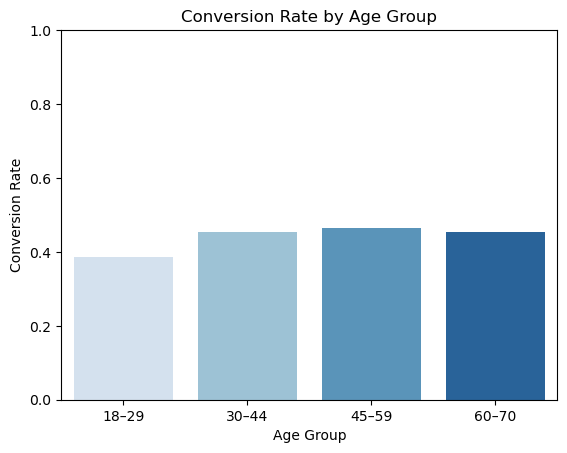

In [383]:
#Plot conversion rate by age group
age_conversion = df_model.groupby('age_group')['converted'].mean().reset_index()

import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(data=age_conversion, x='age_group', y='converted', hue='age_group', palette='Blues', legend=False)
plt.title('Conversion Rate by Age Group')
plt.ylabel('Conversion Rate')
plt.xlabel('Age Group')
plt.ylim(0, 1)
plt.show()

In [384]:
# Reconstruct duration group labels
duration_columns = [col for col in df_model.columns if col.startswith('duration_group_')]
df_model['duration_group'] = 'Very Short'  

for col in duration_columns:
    df_model.loc[df_model[col] == 1, 'duration_group'] = col.replace('duration_group_', '')

In [385]:
duration_conversion = df_model.groupby('duration_group')['converted'].mean().reset_index()

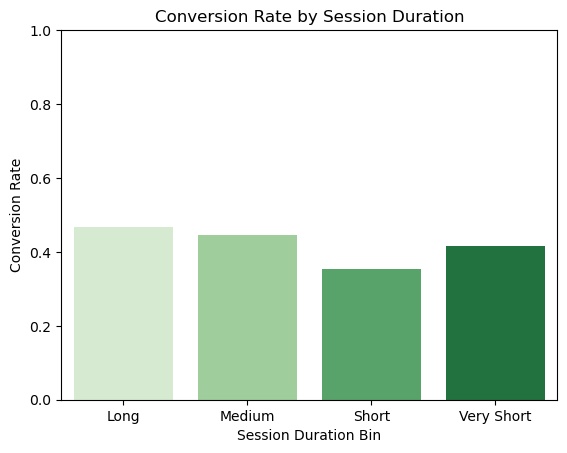

In [386]:
#Plot conversion rate by session duration
sns.barplot(data=duration_conversion, x='duration_group', y='converted', palette='Greens',hue= 'duration_group', legend=False)
plt.title('Conversion Rate by Session Duration')
plt.ylabel('Conversion Rate')
plt.xlabel('Session Duration Bin')
plt.ylim(0, 1)
plt.show()